Question #3:
A:
i: true, because slope for HS is greater than College
ii: false
iii: true
iv: false
B: Y for College=85+10X1+0.07X2+0.01X4 = 137.1 – salary is 137,100 $
C: False, while the coefficient for the GPA/IQ interaction term (𝛽4=0.01β 4=0.01) is small, this does not automatically mean that the interaction effect is insignificant or weak. A small coefficient simply means that the interaction between GPA and IQ results in a relatively small change in the response variable (salary) per unit change in both GPA and IQ. The effect could still be statistically significant if the p-value for the interaction term is small.


In [28]:
!pip install pydataset


Defaulting to user installation because normal site-packages is not writeable


In [29]:
from ISLP import load_data
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [30]:
import pandas as pd

# Convert categorical variables into dummy variables
Carseats = pd.get_dummies(Carseats, drop_first=True)

# Convert boolean columns to integers
Carseats['ShelveLoc_Good'] = Carseats['ShelveLoc_Good'].astype(int)
Carseats['ShelveLoc_Medium'] = Carseats['ShelveLoc_Medium'].astype(int)
Carseats['Urban_Yes'] = Carseats['Urban_Yes'].astype(int)
Carseats['US_Yes'] = Carseats['US_Yes'].astype(int)



In [31]:
import statsmodels.api as sm

# Define the independent variables (predictors)
X = Carseats[['Price', 'Urban_Yes', 'US_Yes']]

# Define the dependent variable (response)
y = Carseats['Sales']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           2.39e-23
Time:                        22:54:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

In [32]:
# Define the independent variables (predictors)
X = Carseats[['Price', 'US_Yes']]

# Define the dependent variable (response)
y = Carseats['Sales']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())
# After fitting your model
print(model.conf_int(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           2.66e-24
Time:                        22:54:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

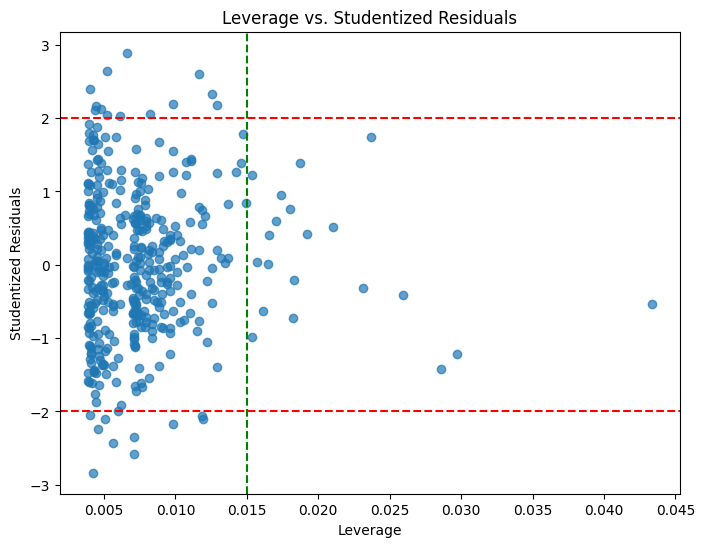

Potential outliers (studentized residuals > 2): [ 17  25  28  30  49  50  57  62  68  82  98 106 143 209 258 297 298 304
 316 328 352 376 395]
High leverage points (leverage > 2p/n): [ 42 125 155 156 159 165 171 174 191 203 208 269 272 313 315 356 365 367
 383 386]
Influential points (Cook's distance > 4/n): [ 25  28  30  49  50  57  68 106 143 165 174 209 258 272 298 310 316 367
 376]


In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Get influence measures
influence = model.get_influence()

# Leverage (Hat values)
leverage = influence.hat_matrix_diag

# Studentized residuals
studentized_residuals = influence.resid_studentized_external

# Cook's distance
cooks_d, _ = influence.cooks_distance

# Plot leverage vs. studentized residuals
plt.figure(figsize=(8,6))
plt.scatter(leverage, studentized_residuals, alpha=0.7)
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Leverage vs. Studentized Residuals')
plt.axhline(y=2, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')
plt.axvline(x=2*X.shape[1]/X.shape[0], color='g', linestyle='--')
plt.show()

# Identify points with high leverage or large residuals
outliers = (abs(studentized_residuals) > 2)
high_leverage = (leverage > 2*X.shape[1]/X.shape[0])
print("Potential outliers (studentized residuals > 2):", np.where(outliers)[0])
print("High leverage points (leverage > 2p/n):", np.where(high_leverage)[0])

# Cook's distance threshold (commonly 4/n)
influential = (cooks_d > 4/X.shape[0])
print("Influential points (Cook's distance > 4/n):", np.where(influential)[0])

10
c: Sales=13.0435−0.0545×Price−0.0219×Urban_Yes+1.2006×US_Yes
d: we can reject the null hypothesis for price and US_Yes as the p-value is very low.
e: Price and US_Yes are significant predictors of Sales, while Urban_Yes is not.
The model explains about 23.9% of the variability in Sales, which suggests that other factors might also be important in predicting Sales.
The overall model is statistically significant, as indicated by the F-statistic.
f: The fit of our regression models can be evaluated using the R-squared and Adjusted R-squared values from the summary output. 
    This means about 23.9% of the variance in Sales is explained by the predictors.


Regression with Abalone Dataset competition

In [34]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [35]:
import pandas as pd

train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

# Check for missing values
print(train_data.isnull().sum())


id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64


Feature Engineering
Encode Categorical Features:

In [36]:
#Convert the Sex feature into numerical categories.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.transform(test_data['Sex'])


In [37]:
#Create Interaction Features: Consider creating interaction terms 
#or polynomial features if they might enhance the model's performance.

In [38]:
#Model Selection
from sklearn.model_selection import train_test_split
X = train_data.drop(columns=['Rings'])
y = train_data['Rings']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#Choose a Regressor:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#Evaluate the Model
#Mean Squared Error (MSE)
#Root Mean Squared Error (RMSE)

In [40]:
## This is the model utilizing the linear regressor 

from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 4.01163965946783
Root Mean Squared Error: 2.002907801040235


Lets look at the randomforestRegressor and its Mean Squared Error to evaluate the best model

In [41]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
## This is the model utilizing the linear regressor 

from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model1.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 0.49216028803178274
Root Mean Squared Error: 0.7015413658735904


In [46]:
#Final Model and Prediction
# Based on low MSE, i decided to to use RandomForestRegressor
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
x_train = train_data.drop(columns=['Rings'])
y_train = train_data['Rings']
final_model.fit(train_data.drop(columns=['Rings']), train_data['Rings'])
test_preds = final_model.predict(test_data)


In [52]:
#Create a submission file in the required format:
submission = pd.DataFrame({'id': test_data['id'], 'Rings': test_preds})
submission.to_csv('submission.csv', index=False)


In [53]:
print(submission)

           id  Rings
0       90615  10.37
1       90616  10.24
2       90617  12.33
3       90618  11.21
4       90619   9.29
...       ...    ...
60406  151021   6.89
60407  151022   9.46
60408  151023  11.89
60409  151024  13.54
60410  151025   9.43

[60411 rows x 2 columns]
